In [1]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [83]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [86]:
# Load the customer data
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [96]:
# Selecting relevant columns for clustering
X = customer_data.iloc[:, 2:]  # selecting Age, Annual Income, Spending Score

In [98]:
# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [99]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # set n_init explicitly
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

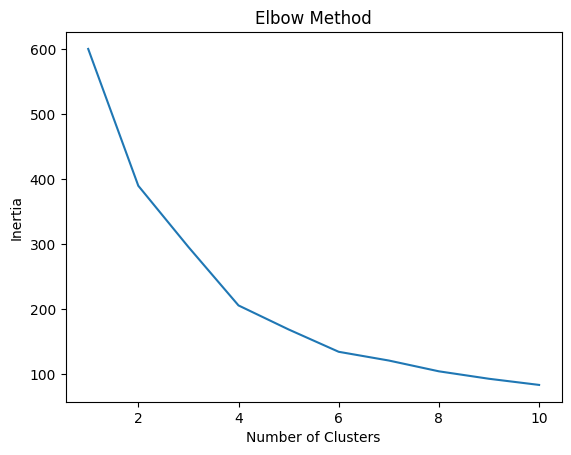

In [100]:
# Plot the Elbow Method graph to determine the optimal number of clusters
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [113]:
# Based on the Elbow Method, choose the optimal number of clusters
optimal_clusters = 5

In [114]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)  # set n_init explicitly
cluster_labels = kmeans.fit_predict(scaled_data)

In [115]:
# Add the cluster labels to the original customer data
customer_data['Cluster'] = cluster_labels

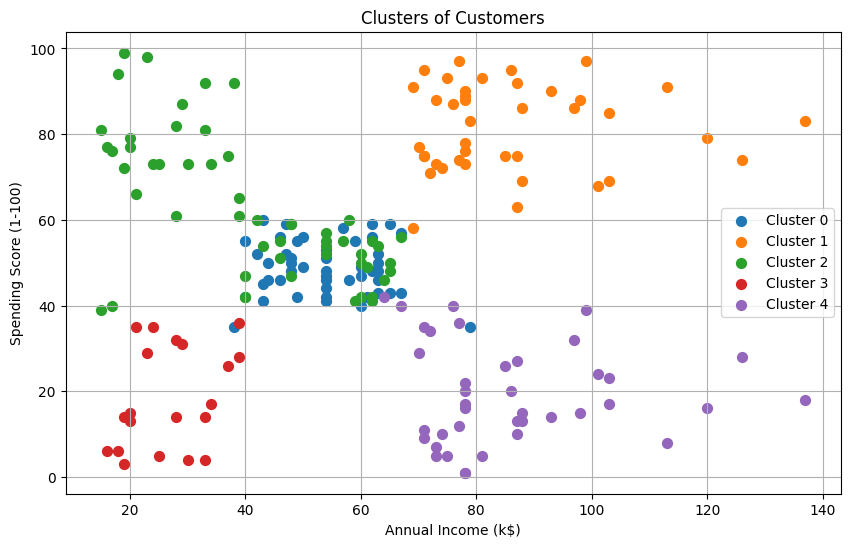

In [116]:
# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', s=50)

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()